# Python程序设计和数据分析
### 前言
* 教学目的:python程序设计和用python进行数据分析
* 教学要求：通过本课程的学习，使学生学会使用Python进行科学计算、可视化绘图、数据处理，分析与建模，将理论与实践相结合，为将来从事数据分析挖掘研究、工作奠定基础。
* 课时：64学时（大数据）
* 成绩评定：实践作业15%+作15%+读书报告（笔记）10%+期末考试60% 

### 教学内容
* python语法基础
* python数据结构
* python函数与异常处理
* python面向对象
* python 文件操作
* 科学计算Numpy
* 数据预处理 pandas
* 数据可视化matplotlib
* 爬虫
* 数据分析建模scikit-learn

# 第1章 Python数据分析概述
### 学习目标
1. 了解数据分析概念、流程主应用场景
2. 了解数据分析常用分析工具
3. 了解Python开发环境及anaconda安装
4. 掌握jupyter notebook操作
5. 掌握Python基本指令和规则

### 学习内容
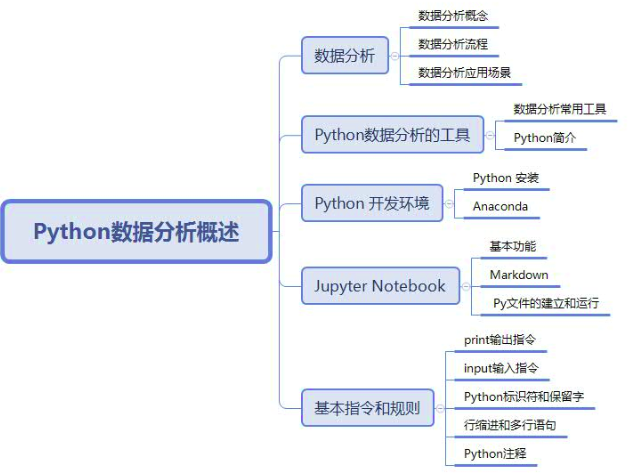

## 1.1认识数据分析
* 数据分析作为大数据技术的重要组成部分，近年来随着大数据技术逐渐发展和成熟。数据分析技能，被认为是数据科学领域中数据从业人员需要具备的技能之一。与此同时，数据分析师也成了时下最热广]的职业之一。数据分析技能的掌握是一个循序渐进的过程。明确数据分析概念、分析流程和分析方法等相关知识是迈出数据分析的第一步。
* 本节任务
    1. 掌握广义的数据分析和狭义的数据分析的概念。
    2. 掌握典型的数据分析流程。
    3. 了解七大类常见的数据分析应用场景。

## 1.1.1数据分析的概念
广义的数据分析包括狭义数据分析和数据挖掘。
* 狭义的数据分析是指根据分析目的，采用对比分析、分组分析、交叉分析和回归分析等分析方法，对收集来的数据进行处理与分析，提取有价值的信息，发挥数据的作用，得到一个特征统计量结果的过程。
* 数据挖掘则是从大量的、不完全的、有噪声的、模糊的、随机的实际应用数据中，通过应用聚类、分类、回归和关联规则等技术，挖掘潜在价值的过程。
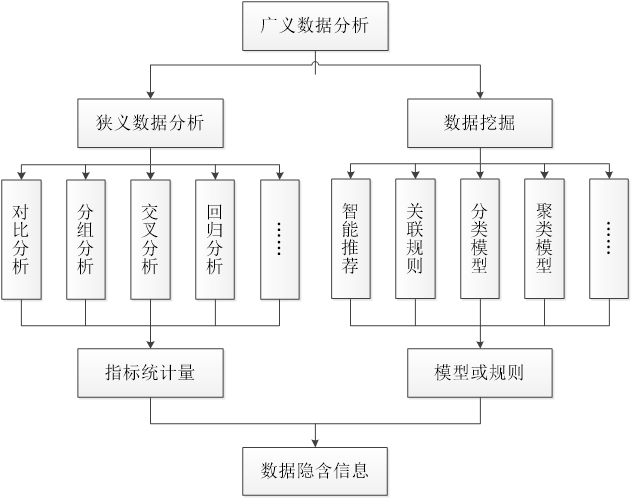

## 1.1.2数据分析的流程
典型的数据分析的流程
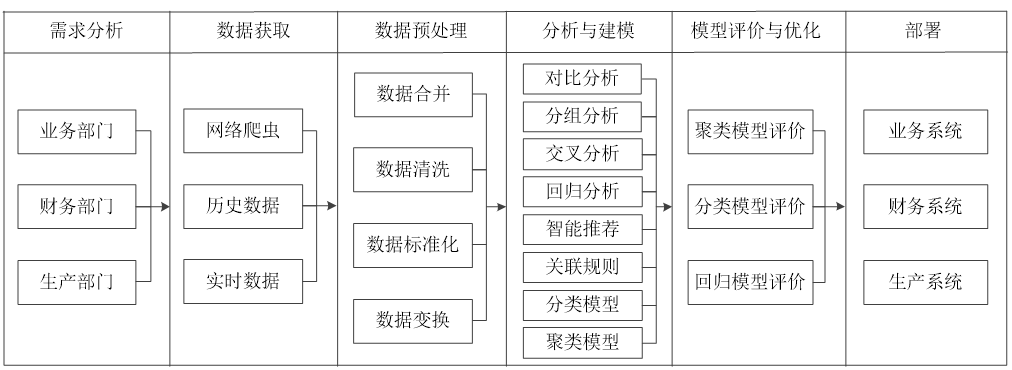
* 需求分析：对要解决的问题进行详细的分析，弄清楚问题的要求。是数据分析环节的第一步和最重要的步骤之一，决定了后续的分析的方向、方法。
* 数据获取：数据是数据分析工作的基础，是指根据需求分析的结果提取，收集数据。
* 数据预处理：数据预处理是指对数据进行数据合并，数据清洗，数据变换和数据标准化，数据变换后使得整体数据变为干净整齐，可以直接用于分析建模这一过程的总称。
* 分析与建模：分析与建模是指通过对比分析、分组分析、交叉分析、回归分析等分析方法和聚类、分类、关联规则、智能推荐等模型与算法发现数据中的有价值信息，并得出结论的过程。
* 模型评价与优化：模型评价是指对已经建立的一个或多个模型，根据其模型的类别，使用不同的指标评价其性能优劣的过程。
* 部署：部署是指将通过了正式应用数据分析结果与结论应用至实际生产系统的过程。


### 【综合案例】对移动客户细分
某通信运营商为了提升业绩，计划实施客户分级管理措施。公司重点关注客户的六个行为因素: 
* 工作日上班时期电话时长（Peak_mins） 
* 工作日下班时期电话时长（OffPeak_mins） 
* 周末电话时长（Weekend_mins）
* 国际电话时长（International_mins） 
* 总通话时长（Total_mins） 
* 平均每次通话时长（average_mins）   
  
根据前期的调研，认为移动用户应当被分为5个主要群体，现希望对移动用户细分，了解他们不同的手机消费习惯,得到相应的定量聚类结果。 现分析是否要标化，若要标化则请用标准差标准化方法进行标化 分析步骤如下 ：
* 对数据进行标化
* 建立kmeans聚类模型
* 进行模型评估

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler #导入标准差标化的方法
from sklearn.cluster import KMeans # 导入机器学习库cluster模块中KMeans函数

In [3]:
#1.获取数据
dfcustmer=pd.read_excel('./data/移动客户细分.xlsx') #读入数据
dfcustmer.head()  #第0列为客户ID

,Customer_ID,Peak_mins,OffPeak_mins,Weekend_mins,International_mins,Total_mins,average_mins
0,K100050,40.608449,18.823708,1.233764,4.473546,60.665921,1.290764
1,K100120,68.123038,33.880341,8.334201,13.423558,110.337580,1.071239
2,K100170,100.200000,31.499999,9.000000,4.858905,140.699999,1.675000
3,K100390,55.800000,18.000000,19.200000,5.621558,93.000000,3.444444
4,K100450,58.631372,9.089143,11.308088,5.061164,79.028603,2.257960


In [4]:
#2.数据预处理
#删除Customer_ID列，并检测特征是否有量纲查异
dfcustmer1=dfcustmer.drop('Customer_ID',axis=1)  #删除Customer_ID列
dfcustmer1.describe()

,Peak_mins,OffPeak_mins,Weekend_mins,International_mins,Total_mins,average_mins
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,708.346918,301.804905,54.164949,172.349186,1064.316772,4.126662
std,515.257990,195.331524,35.261088,146.683424,560.801326,3.803999
min,5.770743,3.203925,0.655996,0.009789,54.809360,0.625730
25%,287.700000,144.300000,26.400000,59.838070,641.100000,2.228541
50%,612.000000,273.600000,46.799999,133.288436,999.300001,2.960776
75%,1030.200000,429.900001,75.600000,246.200990,1396.150001,4.495273
max,2846.399999,1058.400000,205.000000,1014.818532,3423.300000,53.578378


In [19]:
# 用StandardScaler()对数据进行标准化处理
custmer_scaler=StandardScaler().fit(dfcustmer1) ##针对训练集生成离差标准化规则
Zcustmer=custmer_scaler.transform(dfcustmer1) #将规则应用于custmer，进行标准化处理
Zcustmer.shape

(3395, 6)

In [20]:
#3.建立模型
#对预处理后的移动客户数据建立kmeans模型，分为5类KMeans(n_clusters =5,random_state=123)
kmeans_model = KMeans(n_clusters =5,random_state=123)#构建分为5类的模型
kmeans = kmeans_model.fit(Zcustmer)   #对pcacustmer进行模型训练，分为5类
kmeans #显示模型及参数

KMeans(n_clusters=5, random_state=123)

<AxesSubplot:xlabel='class'>

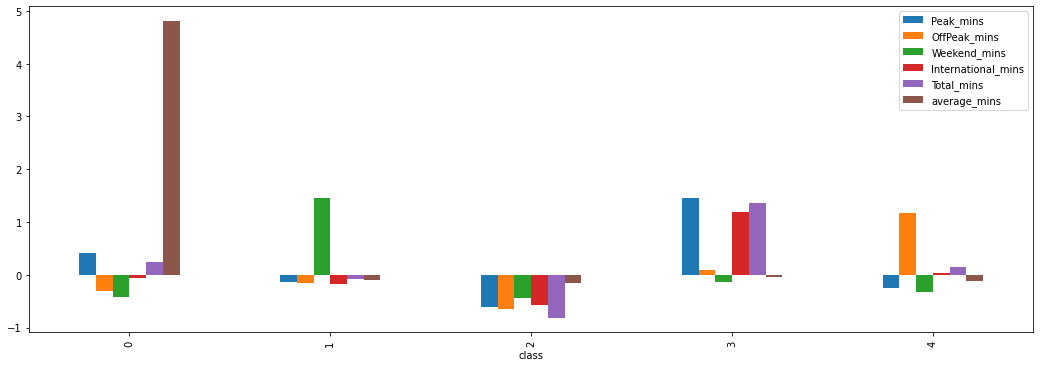

In [21]:
#4.客户分类并分析
dfZcustmer=pd.DataFrame(Zcustmer,columns=dfcustmer1.columns)
dfZcustmer['class']=kmeans.labels_
mean=dfZcustmer.groupby(by='class').mean()
mean.plot.bar(figsize=(18,6))

In [22]:
mean.to_csv("./data/avg.csv")

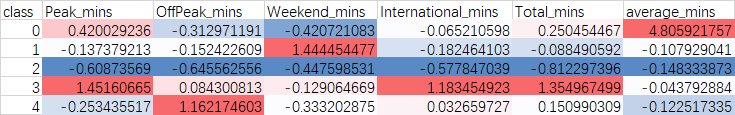

### 客户细分聚类结果分析：总共分为5类
* 0类长聊客户，每次通话时间长
* 1类中低端客户，总通话时间居中，周末通话长，其他通话时间均短；
* 2类不常使用低端客户，总通话时间短，各时段通话时间都短;
* 3类高端商用客户,总通话时间长,工作日上班时间通话长，国际通话时间长；
* 4类中端日常用客户,总通话时间居中,工作日下班时间通话占比高

本项目主要目的是找到有价值的客户和有潜力的客户，找到后即可根据不同类客户特征进行精准营销

## 1.1.3了解数据分析应用场景
### 1. 客户分析

* 主要是客户的基本数据信息进行商业行为分析，首先界定目标客户，根据客户的需求，目标客户的性质，所处行业的特征以及客户的经济状况等基本信息使用统计分析方法和预测验证法，分析目标客户，提高销售效率。
* 其次了解客户的采购过程，根据客户采购类型、采购性质进行分类分析制定不同的营销策略。
* 最后还可以根据已有的客户特征，进行客户特征分析、客户忠诚分析、客户注意力分析、客户营销分析和客户收益分析。
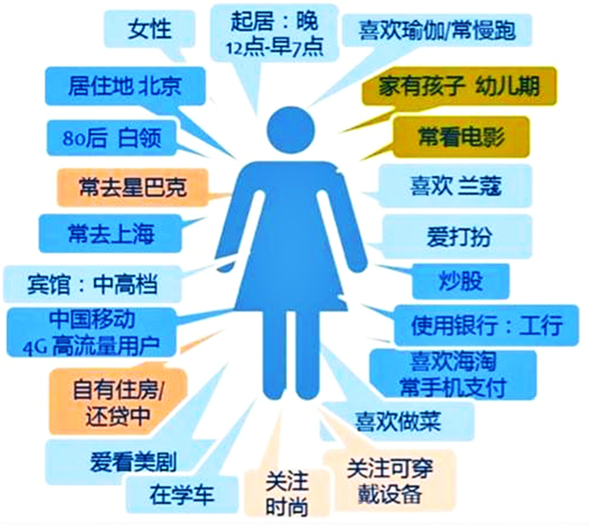

### 2. 营销分析
* 产品分析主要是竞争产品分析，通过对竞争产品的分析制定自身产品策略。
* 价格分析又可以分为成本分析和售价分析，成本分析的目的是降低不必要成本，售价分析的目的是制定符合市场的价格。
* 渠道分析目的是指对产品的销售渠道进行分析，确定最优的渠道配比。
* 广告与促销分析则能够结合客户分析，实现销量的提升，利润的增加。

### 3. 社交媒体分析
* 以不同社交媒体渠道生成的内容为基础，实现不同社交媒体的用户分析，访问分析，互动分析等。同时，还能为情感和舆情监督提供丰富的资料。
* 用户分析主要根据用户注册信息，登录平台的时间点和平时发表的内容等用户数据，分析用户个人画像和行为特征。
* 访问分析则是通过用户平时访问的内容，分析用户的兴趣爱好，进而分析潜在的商业价值。
* 互动分析根据互相关注对象的行为预测该对象未来的某些行为特征。
    - https://www.chyxx.com/industry/201610/455990.html
    - https://mp.weixin.qq.com/s/rfGkSWEMOqDBqCif_9YxKg

### 4. 网络安全
    新型的病毒防御系统可使用数据分析技术，建立潜在攻击识别分析模型，监测大量网络活动数据和相应的访问行为，识别可能进行入侵的可疑模式，做到未雨绸缪。
### 5. 设备管理
    通过物联网技术能够收集和分析设备上的数据流，包括连续用电、零部件温度、环境湿度和污染物颗粒等无数潜在特征，建立设备管理模型，从而预测设备故障，合理安排预防性的维护，以确保设备正常作业，降低因设备故障带来的安全风险。
### 6. 交通物流分析
    物流是物品从供应地向接收地的实体流动。通过业务系统和GPS定位系统获得数据，对于客户使用数据构建交通状况预测分析模型，有效预测实时路况、物流状况、车流量、客流量和货物吞吐量，进而提前补货，制定库存管理策略。
### 7. 欺诈行为检测
    身份信息泄露盗用事件逐年增长，随之而来的是欺诈行为和交易的增多。公安机关，各大金融机构，电信部门可利用用户基本信息，用户交易信息，用户通话短信信息等数据，识别可能发生的潜在欺诈交易，做到提前预防未雨绸缪。


# 1.2 Python数据分析的工具
* 本节任务：
    - (1)了解数据分析常用的Python、 R和MATLAB工具。
    - (2)了解使用Python工具进行数据分析的优势。
    -(3)了解Python数据分析常用类库。

## 1.2.1 数据分析常用工具
目前主流的数据分析语言有R，Python，MATLAB三种程序语言。
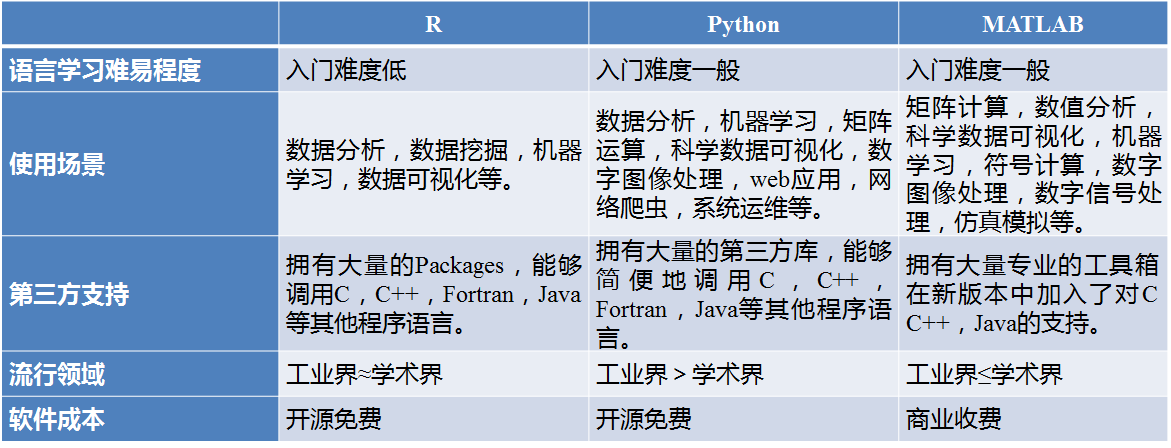

TIOBE 8月编程语言指数排行榜公布
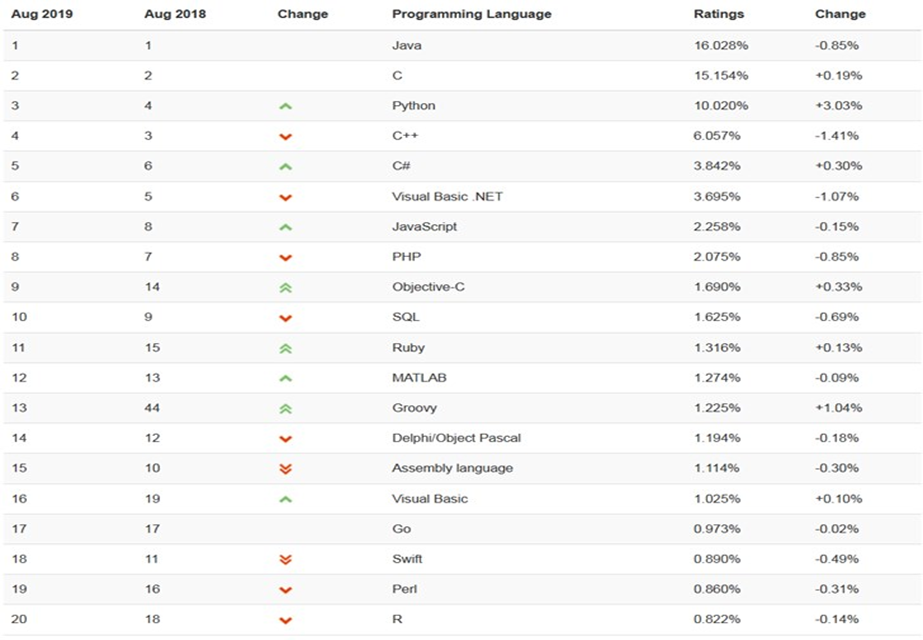

https://www.tiobe.com/tiobe-index/

## 1.2.2 python简介
	Python是种简单 易学， 功能强大的编程语言，它有高效率的高层数据结构，简单而有效地实现面向对象编程。Python简洁的语法和对动态输入的支持再加上解释性语言的本质，使得它在大多数平台.上的许多领域都是一个理想的脚本语言，特别适 用于快速的应用程序开发。
### python特点：
1. 简单、易学
    - Python是一种代表极简主义的语言,有简单的语法，容易上手。这种伪代码本质使你能够专注于解决问题而不是去搞明白语言本身。
2. 面向对象、高层
   -  无需关注底层细节,例如程序的内存管理等。与其他语言相比，Python以强大而又简单的方式实现面向对象编程。 
3. 解释性
   - Python程序不需要编译成二进制代码,可以直接在源代码上运行。对于编译性语言(C/C + +源文件->编译/链接器->可执行文件。
4. 免费开源、可移植
   - 由于它的开源本质，Python可以被移植到许多平台上:如Unix衍生系统Windows系统,掌上平台(掌上电脑/手机) , 游戏控制台(PSP)等等。
5. 可扩展、可嵌入
   - 如果一段关键代码希望运行得更快或者不公开,可以把这部分程序用C/C+ +编写,然后在Python程序中使用它们。也可以把Python嵌入到C/CR +程序。
6. 丰富的库
   - Python标准库很庞大，包括网络、文件、GUL数据库、单元测试等。此外还有丰富的第 三方库，如Web框架、科学计算库、爬中库、机器学习库等

### Python主要应用领域
1. Web应用开发：服务器端编程，具有丰富的Web开发框架，如Django和TurboGears，快速完成一个网站的开发和Web服务。典型如国内的豆瓣、果壳网等；国外的Google、Dropbox等。
2. 系统网络运维:在运维的工作中，有大量重复性工作的地方，并需要做管理系统、监控系统、发布系统等，将工作自动化起来，提高工作效率，这样的场景Python是一门非常合适的语言。
3. 科学计算：Python被广泛的运用于科学计算中，例如生物信息学、物理、建筑、地理信息系统、图像可视化分析、生命科学等，常用numpy、SciPy、Biopython、SunPy等。
4. 人工智能与机器学习：人工智能是现在非常火的一个方向，AI热潮让Python语言的未来充满了无限的潜力。现在释放出来的几个非常有影响力的AI框架，大多是Python的实现，为什么呢？因为Python足够动态、具有足够性能，这是AI技术所需要的技术特点。比如基于Python的深度学习库、深度学习方向、机器学习方向、自然语言处理方向的一些网站基本都是通过Python来实现的。
5. 数据分析处理：数据分析处理方面，Python有很完备的生态环境。“大数据”分析中涉及到的分布式计算、数据可视化、数据库操作等，Python中都有成熟的模块可以选择完成其功能。对于Hadoop-MapReduce和Spark，都可以直接使用Python完成计算逻辑。这无论对于数据科学家还是对于数据工程师而言都是十分便利的。
6. 图形界面开发：Python可编写桌面图形用户界面，还可以扩展微软的Windows，常用Tk、GTK+、PyQt、win32等。  
https://www.lagou.com/

### Python数据分析的优势
	语法简单精练。对于初学者来说，比起其他编程语言，Python更容易上手。  
	有很强大的库。可以只使用Python这一种语言去构建以数据为中心的应用程序。  
	功能强大。Python是一个混合体，丰富的工具集使它介于传统的脚本语言和系统语言之间。Python不仅具备所有脚本语言简单和易用的特点，还提供了编译语言所具有的高级软件工程工具。  
	不仅适用于研究和原型构建，同时也适用于构建生产系统。研究人员和工程技术人员使用同一种编程工具，会给企业带来非常显著的组织效益，并降低企业的运营成本。  
	Python是一门胶水语言。Python程序能够以多种方式轻易地与其他语言的组件“粘接”在一起。  

## 1.2.3 Python数据分析常用类库


### 1．Python函数和标准库
	Python语言的核心包含数字、字符串、列表、字典、文件等常见类型和函数。  
	Python标准库提供了系统管理、网络通信、文本处理、数据库接口、图形系统、XML处理等额外的功能。
  

### 2．NumPy(Numerical Python)—— Python 科学计算的基础包 
	快速高效的多维数组对象 ndarray。  
	对数组执行元素级的计算以及直接对数组执行数学运算的函数。  
	读写硬盘上基于数组的数据集的工具。  
	线性代数运算、傅里叶变换，以及随机数生成的功能。  
	将 C、C++、Fortran 代码集成到 Python 的工具。  

 
### 3．SciPy——专门解决科学计算中各种标准问题域的模块的集合
SciPy 主要包含了 8 个模块，不同的子模块有不同的应用，如插值、积分、优化、图像处理和特殊函数等。  
	scipy.integrate     数值积分例程和微分方程求解器  
	scipy.linalg          扩展了由 numpy.linalg 提供的线性代数例程和矩阵分解功能  
	scipy.optimize     函数优化器（最小化器）以及根查找算法  
	scipy.signal         信号处理工具  
	scipy.sparse        稀疏矩阵和稀疏线性系统求解器  
	scipy.special       SPECFUN（这是一个实现了许多常用数学函数的 Fortran 库）的包装器  
	scipy.stats           检验连续和离散概率分布、各种统计检验方法，以及更好的描述统计法  
	scipy.weave        利用内联 C++代码加速数组计算的工具  
 
 
### 4．Pandas——数据分析核心库
	提供了一系列能够快速、便捷地处理结构化数据的数据结构和函数。  
	高性能的数组计算功能以及电子表格和关系型数据库（如 SQL）灵活的数据处理功能。   
	复杂精细的索引功能，以便便捷地完成重塑、切片和切块、聚合及选取数据子集等操作。  

### 5．Matplotlib——绘制数据图表的 Python 库
	Python的2D绘图库，非常适合创建出版物上用的图表。    
	操作比较容易，只需几行代码即可生成直方图、功率谱图、条形图、错误图和散点图等图形。   
	提供了pyplotlab的模块，其中包括了NumPy和pyplot中许多常用的函数，方便用户快速进行计算和绘图。   
	交互式的数据绘图环境，绘制的图表也是交互式的。   


### 6．scikit-learn——数据挖掘和数据分析工具
	简单有效，可以供用户在各种环境下重复使用。   
	封装了一些常用的算法方法。   
	基本模块主要有数据预处理、模型选择、分类、聚类、数据降维和回归 6 个，在数据量不大的情况下，scikit-learn可以解决大部分问题。   


# 1.3 Python 开发环境

## 1.3.1 Python 安装
### 1.安装python内核和开发工具
* 方法1：安装python3.7和开发工具如pycharm   
    1）python官方网站安装pyhon3.7 :https://www.python.org/   
    2）安装IDE 开发工具pycharm,分为专业版和社区版（免费），社区版即可(https://www.jetbrains.com/pycharm/download/) 

* 方法2：Anaconda官方网站下载并安装 python3.7:https://www.anaconda.com/download/  
    - 下载多种版本（清华镜像）https://mirrors.tuna.tsinghua.edu.cn/anaconda/archive/
    - 有mac版本、Linux版本和windows版本，不同系统版本不同。64位系统和32位也不同
   
### 2.用pip install安装不同的Package

In [ ]:
#查看安装的包
pip list

In [ ]:
#查看python版本与程序位置
import sys
print(sys.version)
sys.executable

## 1.3.2 Anaconda
### 1.了解Anaconda
* 预装了大量常用 Packages。  
* 完全开源和免费。  
* 额外的加速和优化是收费的，但对于学术用途，可以申请免费的 License。  
* 对全平台和几乎所有Python版本支持。  
* python在Anaconda中的主要开发平台：
    - Jupyter notebook
    - Spyder
    - Ipthon  


### 2.在 Windows 系统上安装 Anaconda
* 安装流程： 
安装包——“next”——“I agree”——“All Users(requires admin privileges)”——选择安装路径——“Install”——“finish”。

### 3.Spyder——交互式 Python 语言开发环境
* 提供高级的代码编辑、交互测试和调试等特性。  
* 包含数值计算环境。   
* 可用于将调试控制台直接集成到图形用户界面的布局中。   
* 模仿MATLAB的“工作空间”，可以很方便地观察和修改数组的值。   

### 4.Jupyter Notebook——交互式笔记本
* jupyter  notebook是一个在线编辑器，可以在网页上编辑程序，在编辑的过程中，每次编辑一行代码就可以运行一行代码，运行的结果也可以显示在代码的下方，方便查看。当所有的程序编写和运行完毕之后，还可以直接把编辑和运行之后的所有信息保存在文件中。   
* Jupyter notebook： 一个交互式笔记本，支持运行 40 多种编程语言。 利用她来写 Python，代码和运行结果都可以保存下载，十分方便。是数据分析的主要平台    
* Jupyter notebook，保存的文件扩展名是：jpynb  

# 1.4 Jupyter Notebook

## 1.4.1  Jupyter Notebook 的基本功能
### 1、Jupyter Notebook启动
* 方法1： 【开始】|【所有程序】|【Anaconda3】|【jupyter notebook】
* 方法2:   【Anaconda3】|【 Jupyter Notebook】
* 方法3： 【开始】|【所有程序】|【Anaconda3】|【Anaconda  Prompt】
            * 命令窗口 输入 ： Jupyter Notebook
* Jupyter Notebook服务就会启动，并在电脑默认浏览器里打开首页home并显示当前工作目录的文件
* 在命令提示符窗口使用Control-C停止服务，双击则跳过确认

### 2、新建一个Notebook
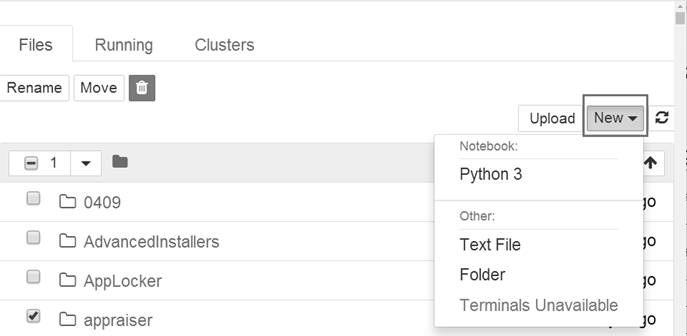
* Text File”为纯文本型
* “Folder” 为文件夹
* “Python 3” 表示 Python 运行脚本
* 保存的文件扩展名是：jpynb
* 方法：选择”Python 3”选项，进入 Python 脚本编辑界面


### 3、Jupyter Notebook 的界面及其构成
* Notebook 文档由一系列单元（Cell）构成，主要有两种形式的单元。
    - 代码code单元，编写代码
    - Markdown 单元。对文本进行编辑。
* 编辑界面
    - 编辑模式：用于编辑文本和代码，按Enter切换为编辑模式，当前cell侧边绿蓝色
    - 命令模式：用于执行键盘输入的快捷命令。按Esc切换为命令模式，当前cell侧边为蓝色

### 4、 快捷键
* “Y” 键：切换到代码单元
* “M”键：切换到 Markdown 单元
* “B”键：在本单元的下方增加一单元
* “H”键：显示所有快捷方式
*  Ctrl-Enter：运行当前cell
* Shift-Enter：运行当前cell并跳转到下一cell
* Alt-Enter：运行当前cell并在下方新建cell
* Ctrl+Z：撤销操作
* Ctrl+shift+Z：重复操作
* 拆分单元 (split cell)：编辑模式下按ctrl+shift+-
* 合并单元：在命令模式下，先用shift+j或shift+k选中想合并的单元，然后用shift+m合并

### 【案例1】：编写两个整数相加的程序
操作步骤：
1. 启动jupyter notebook,打开页面
2. 选择右上角【New】|【python 3】
3. 选择code模式，编写代码
4. 按shift+Enter运行程序，查看结果

## 1.4.2  Jupyter Notebook 的高级功能
### 1．Markdown
Markdown 是一种可以使用普通文本编辑器编写的标记语言，通过简单的标记语法，它可以使普通文本内容具有一定的格式。  
[mardon语法文档](<https://blog.csdn.net/witnessai1/article/details/52551362>)
#### 标题：标题是标明文章和作品等内容的简短语句。一个“#”字符代表一级标题，以此类推。
* 换行：按两个空格分段即换行

#### 列表：列表是一种由数据项构成的有限序列，即按照一定的线性顺序排列而成的数据项的集合。
    - 对于无序列表，使用星号、加号或者减号作为列表标记+一个空格
    - 对于有序列表，则是使用数字+“.”+一个空格。

#### 加粗／斜体：前后有一个下划线或星号表示斜体，前后有两个星号或下划线表示加粗，前后有 3 个星号或下划线表示加粗斜体。

#### 表格：列与列之间用符号“｜”隔开，表格每一行的两边也要有符号“｜”。
* 代码的第一行表示表头，如：|姓名|学号|成绩|
* 第二行分隔表头和主体部分，如：|-|-|-|
* 从第三行开始，每一行代表一个表格行，如：|李明|22|78|。


#### 插入图片
    - 方法1：复制图片粘贴到Markdowm编辑框
    - 方法2：插入图片：语法说明：![图片Alt](图片地址 “图片Title”)
        - 语法中图片Alt的意思是如果图片因为某些原因不能显示，就用定义的图片Alt文字来代替图片。
        - 图片Title则和链接中的Title一样，表示鼠标悬停与图片上时出现的文字。 Alt 和 Title 都不是必须的，可以省略，但建议写上。

![img](http://ipython.org/_static/IPy_header.png)

#### 数学公式编辑：LaTeX 是写科研论文的必备工具， Markdown 单元中也可以使用 LaTeX 来插入数学公式。
    - 在文本行中插入数学公式，应在公式前后分别加上一个“$” 符号
    - 如果要插入一个数学区块，则在公式前后分别加上两个“$$”符号。

$e=mc^{2}$
$$ z=\frac{x}{y} $$
$$
\sum_{i=1}^{n}X $$

### 2．导出功能
* Notebook 还有一个强大的特性，就是导出功能。可以将 Notebook 导出为多种格式，如HTML、Markdown、reST、PDF（通过 LaTeX）等格式。
* 导出功能可通过选择“File”→“Download as”级联菜单中的命令实现。

In [ ]:
#将第1章文档导出为html，并保存为pdf文档

### 【案例2】读取学生成绩信息，进行基本描述统计分析，并画散点图
1. 编写用markdown制作以下文本  
【案例2】读取学生成绩信息，进行基本描述统计分析，并画散点图
2. 编写代码，并执行
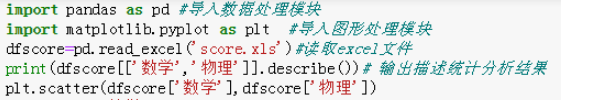

## 1.4.3Jupyter notebook中 Py文件的建立和运行
* 将cell代码存入py文件，格式：%%writefile  <文件名.py >
    - 例：%%writefile hello.py #把cell内容保存到本目录下的hello.py文件
          print("hello world")
* 运行py文件格式： %run  <文件名.py>
    - 例： %run hello.py #运行本地的hello.py文件
* 读入py文件格式：%load <文件名.py>
    - 例：%load <hello.py>

### 课堂练习
1. 选择课件部分内容 用markdown做一个网页。熟悉notebook环境
2. 将案例2的代码保存到一个py文件，并打开运行

# 1.5Python基本指令和规则
## 1.5.1 Python基本指令
### 1.print输出
* Print是python里很基本很常见的一个操作，它的操作对象是一个字符串。

#### 基本语法格式：print(*objects, sep=' ', end='\n', file=sys.stdout)
* 参数：objects ，表示可以一次输出多个表达式。输出多个表达式时，需要用 , 分隔。
    - sep -- 多个表达式之间间隔符，默认值是一个空格。
    - end -- 用来设定以什么结尾。默认值是换行符 \n，我们可以换成其他字符串。
    - file -- 指定写入的文件对象。默认sys.stdout：表示屏幕输出


In [ ]:
print("hello world")

In [ ]:
new=open("talk.text","w")  #以写方式新建打开new.text文件
print("hello","bye",sep="*",file=new) #将输出结果hello*bye保存到new指向的talk.text文件

#### 语法格式2：print(“%格式符1%格式符2……”%（表达式1，表达式2))
* 参数：%格式符1 ： 指定表达式1的输出格式，
     - %d：十进制整数, %s：字符串，%f:浮点数，%o:八进制，%x:十六进制
* 返回值：无

In [3]:
a=b=3.2
print("%4.2f+%4.2f=%6.2f" %(a,b,a+b))  # 6.2f表示宽度为6，小数2位的浮点数

3.20+3.20=  6.40


### 2. input输入指令

 Python3.x 中 input() 函数接受一个标准输入数据，返回为 string 类型。
* 语法：input([“提示信息”])
* 功能：显示提示信息，用户输入数据做为返回值
* 返回值：输入的数据

In [ ]:
a = input("input:")   # 输入整数则a= 123
print(a)

### 3.eval()：
* 语法：变量=eval("表达式")
* 返回表达式结果

In [ ]:
a = eval("1.11 + 5.55")
print(a)

In [2]:
#eval()结合input()使用 获取用户输入的数字
a = eval(input("请输入一个数:"))
print(a*2)

请输入一个数:10
20


In [ ]:
#练习：编写一个程序，输入两个数，求两个数的和并输出结果

## 1.5.2 基本规则
### 1.Python标识符
标识符在机器语言中是一个被允许作为名字的有效字符串。Python中标识符主要体现在变量、函数、类、模块、对象等的命名。   
Python中对标识符有如下几点规定:
1. 标识符可以由字母、数字和下划线组成。
2. 标识符不能以数字开头，以下划线开头的标识符具有特殊的意义，使用时需要特别注意。
    - 以单下划线开头（如_foo）的标识符代表不能直接访问的类属性，需通过类提供的接口进行访问，不能用“from xxx import *”导入。
    - 以双下划线开头（如__foo）的标识符代表类的私有成员,只可在类内访问，不可继承
    - 以双下划线开头和结尾（如_ _ _foo_ _ _ _）的标识符代表Python里特殊方法专用的标识，如_ _ _ _init_ _ _()代表类的构造函数。
3. 标识符字母区分大小写，例如“Abc”与“abc”是两个标识符。
4. 标识符禁止使用Python中的保留字。



In [ ]:
import keyword
keyword.iskeyword("and")         # 查看“and”是否为保留字

### 2.Python 保留字符
下面的列表显示了在Python中的保留字。这些保留字不能用作常数或变数，或任何其他标识符名称。所有 Python 的关键字只包含小写字母。
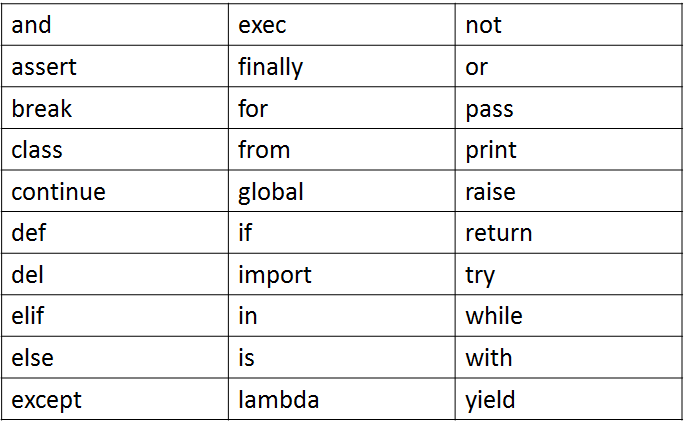

In [ ]:
keyword.kwlist                   # 查看Python3中所有的保留字

###  3.行和缩进
* Python代码的缩进规则。具有相同缩进的代码被视为代码块。所有代码块语句必须包含相同的缩进空白数量
* 缩进请严格按照Python的习惯写法：4个空格，不要使用Tab，更不要混合Tab和空格，否则很容易造成因为缩进引起的语法错误。

In [ ]:
# 代码块包含相同的空格数
if True:
    print('我的行缩进空格数相同')
else:
    print('我的缩进空格数不同')

In [ ]:
#输入一个数，求绝对值


### 4.多行语句

####  1)一行多个语句
* 使用分号（；）对多个短语句实现隔离，可以在同一行实现多个语句。
    - applePrice = 8;  bananaPrice = 3.5;  pearPrice = 5

In [26]:
#一行多个语句
applePrice = 8; bananaPrice = 3.5; pearPrice = 5

#### 2)多行一个语句
* Python 通常是一行写完一条语句，但如果语句很长，我们可以使用反斜杠(\\)来实现多行语句，例如：
    - total = item_one + \
    - item_two + \
    -item_three
* 在 [], {}, 或 () 中的多行语句，不需要使用反斜杠(\)，例如：
    - total = ['item_one', 'item_two', 'item_three', 
    - 'item_four', 'item_five']

In [27]:
#多行一个语句
price=applePrice \
    +bananaPrice+ pearPrice
price

16.5

In [28]:
print("python 中多行注释使\
用三个单引号或三个双引号。")

python 中多行注释使用三个单引号或三个双引号。


In [29]:
# [], {}, 或 () 中一行多个语句
total = ['item_one', 'item_two', 'item_three',
         'item_four', 'item_five']
total


['item_one', 'item_two', 'item_three', 'item_four', 'item_five']

### 5.Python注释
* python中单行注释采用 # 开头
* python 中多行注释使用三个单引号(''')或三个双引号(""")。


In [23]:
print("Hello,World!")                   # 这是一个在代码后面的注释

Hello,World!


In [24]:
'''
该多行注释使用的是三个单引号
该多行注释使用的是三个单引号
该多行注释使用的是三个单引号
'''

'\n该多行注释使用的是三个单引号\n该多行注释使用的是三个单引号\n该多行注释使用的是三个单引号\n'

# 总结
1. 数据分析流程
2. 数据分析工具python语言
3. python开发环境
4. jupyter notebook操作
5. python基本指令和规则

# 课后作业
1. 安装Anaconda  
2. 第1 章课后练习
3. 预习python基础：包括变量、基本数据类型、控制结构
4. 从网上搜索python教学视频，自学
5. 查阅资料，了解python的PEP8编程规范